# Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance

In [1]:
!pip install xgboost

In [2]:
!pip install catboost

In [3]:
!pip install lightgbm

# Requried libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

# Data

In [5]:
data= pd.read_csv('Test_data.csv') # Import the data in the form of csv

In [6]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [7]:
data.describe() #Describe the data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [8]:
nan_counts = data.isnull().sum() # Find and count null values

nan_counts

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

# Data Cleaning
**Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.**

**In this task, you can execute the below steps & proceed further**

*-Treat NULL Values (if any)*

*-Remove duplicate data / check all the columns and look for the useful metrics which can be employed in the model*


**Find corelation for filling the null values in "education" and "previous_year_rating" columns**

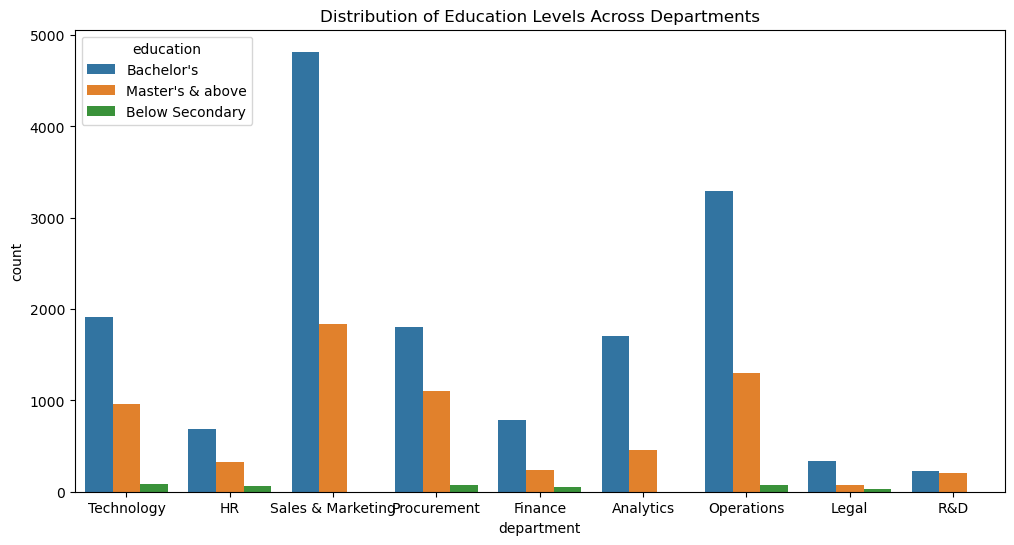

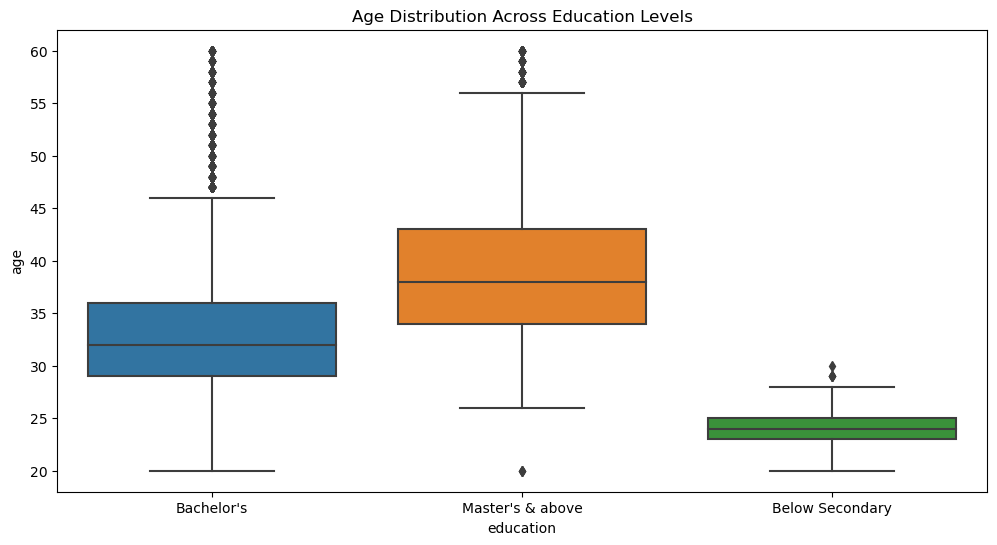

In [9]:
# Department vs. Education
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='department', hue='education')
plt.title('Distribution of Education Levels Across Departments')
plt.show()

# Age vs. Education
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='education', y='age')
plt.title('Age Distribution Across Education Levels')
plt.show()

# Region vs. Education
#plt.figure(figsize=(12, 6))
#sns.countplot(data=data, x='region', hue='education')
#plt.title('Distribution of Education Levels Across Regions')
#plt.show()
# Recruitment Channel vs. Education
#plt.figure(figsize=(12, 6))
#sns.countplot(data=data, x='recruitment_channel', hue='education')
#plt.title('Distribution of Education Levels Across Recruitment Channels')
#plt.show()


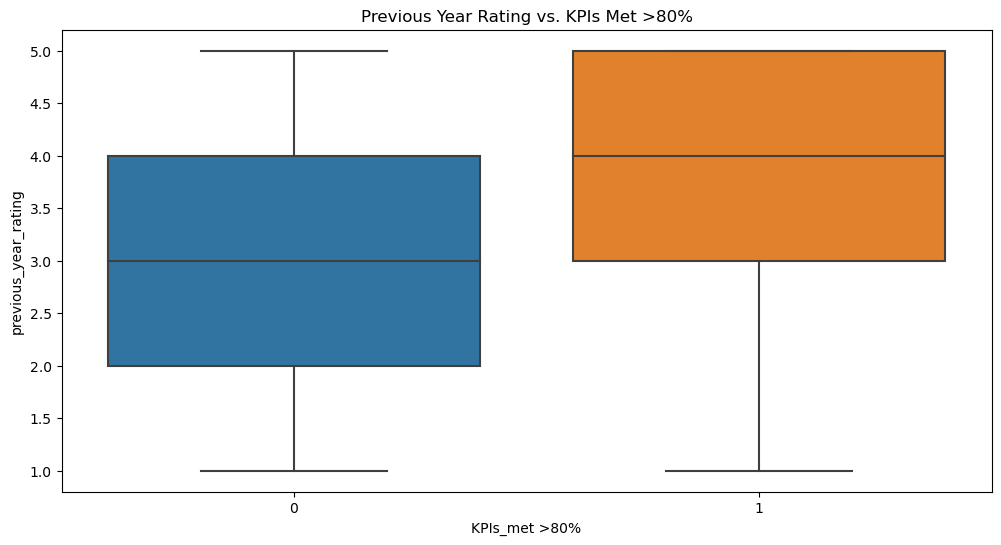

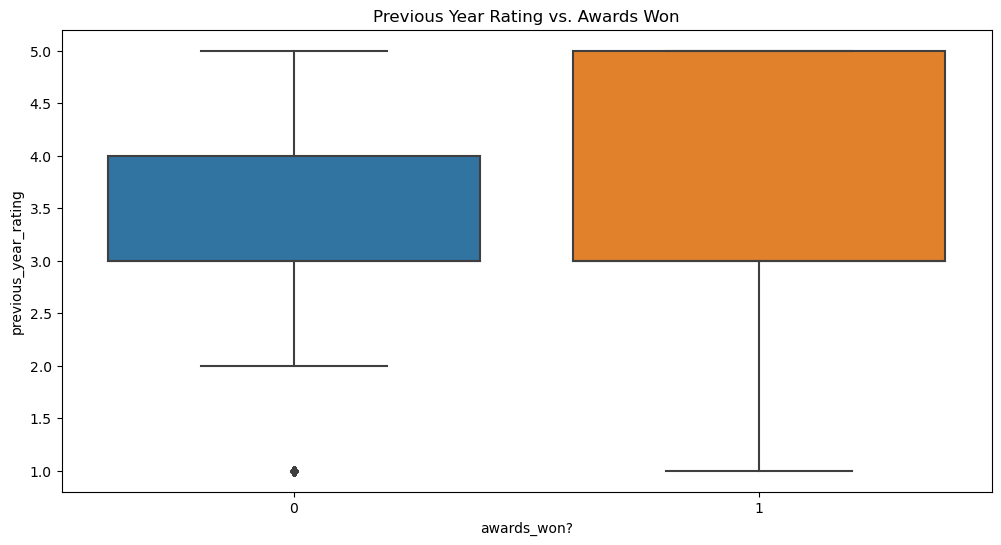

In [10]:
# KPIs_met >80% vs. Previous Year Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='KPIs_met >80%', y='previous_year_rating')
plt.title('Previous Year Rating vs. KPIs Met >80%')
plt.show()

# Awards Won vs. Previous Year Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='awards_won?', y='previous_year_rating')
plt.title('Previous Year Rating vs. Awards Won')
plt.show()

# Average Training Score vs. Previous Year Rating
#plt.figure(figsize=(12, 6))
#sns.scatterplot(data=data, x='avg_training_score', y='previous_year_rating', hue='KPIs_met >80%')
#plt.title('Previous Year Rating vs. Average Training Score')
#plt.show()
# Number of Trainings vs. Previous Year Rating
#plt.figure(figsize=(12, 6))
#sns.boxplot(data=data, x='no_of_trainings', y='previous_year_rating')
#plt.title('Previous Year Rating vs. Number of Trainings')
#plt.show()


# Fill null values

In [11]:
# Create a combined feature of 'age' and 'department'
data['age_department'] = data['age'].astype(str) + '_' + data['department']

# Fill missing values in 'education' based on the most frequent value in the corresponding 'age_department'
data['education'] = data.groupby('age_department')['education'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [12]:
# Create a combined feature of 'awards_won' and 'KPIs_met >80%'
data['awards_kpis'] = data['awards_won?'].astype(str) + '_' + data['KPIs_met >80%'].astype(str)

# Fill missing values in 'previous_year_rating' based on the most frequent value in the corresponding 'awards_kpis'
data['previous_year_rating'] = data.groupby('awards_kpis')['previous_year_rating'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))

# Drop the temporary 'awards_kpis' column
data = data.drop(columns=['awards_kpis'])

# Save the processed data
data.to_csv('employee_performance_filled.csv', index=False)


In [13]:
nan_counts = data.isnull().sum()
# again see the any null value are remain or not
    
nan_counts

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
age_department          0
dtype: int64

**Find and remove duplicate rows**

In [14]:
# Display basic information and check for duplicates
data.info()
print("Number of duplicate rows:", data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
 13  age_department        23490 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 2.5+ MB
Number of dup

In [15]:
# Check data types
data.dtypes.describe()

count        14
unique        3
top       int64
freq          7
dtype: object

# Correlation Matrix
**The correlation matrix plot helps us understand the relationships between different features in our dataset. By visualizing the correlations, we can identify which features are strongly correlated with each other and with the target variable (KPIs_met >80%). This information is crucial for feature selection and understanding the data.**

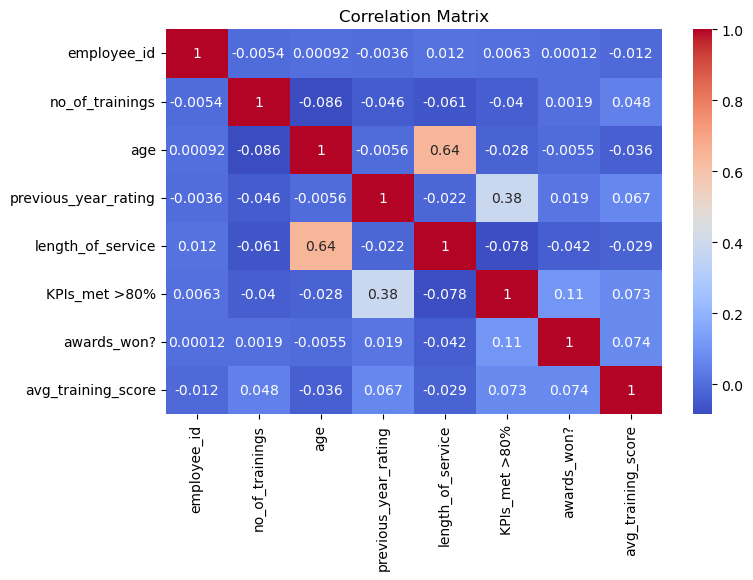

In [16]:
# Plot correlations
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature scaling
scaler = StandardScaler()
scaled_columns = ['age', 'length_of_service', 'avg_training_score']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Display the processed data
data


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_department
0,8724,8,18,0,1,2,1,-1.404150,5.0,-1.143200,1,0,1.024263,24_Technology
1,74430,2,28,0,0,0,1,-0.492612,3.0,-0.192590,0,0,-0.914377,31_HR
2,72255,7,4,0,1,0,1,-0.492612,1.0,-0.430243,0,0,-1.212629,31_Sales & Marketing
3,38562,5,11,0,0,0,3,-0.492612,2.0,0.758019,0,0,0.129506,31_Procurement
4,64486,1,21,0,1,2,1,-0.622832,4.0,0.282714,0,0,-0.168746,30_Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,2,1,-1.404150,3.0,-1.143200,0,0,-0.168746,24_Legal
23486,25600,8,17,0,1,2,1,-0.492612,3.0,0.282714,0,0,0.800574,31_Technology
23487,45409,2,7,0,0,2,1,-1.143711,4.0,-0.430243,0,0,-0.988940,26_HR
23488,1186,5,24,0,1,2,3,-1.013491,3.0,-1.143200,0,0,0.502321,27_Procurement


# Visualize Count Plots & Unique Values to infer from Datasets
**Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.**

**In this task, you must execute the below steps:**

*-Use Charts (Count plots) to examine and compare the features present in the dataset*

*-Identify trends and insights from the above plots*

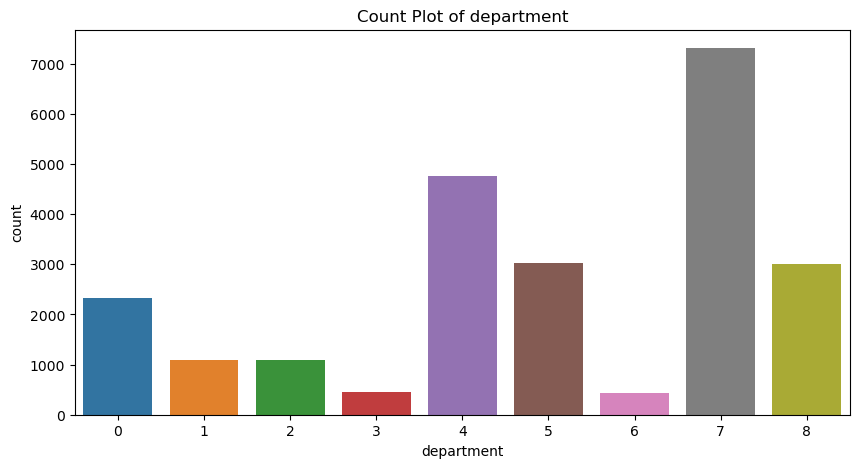

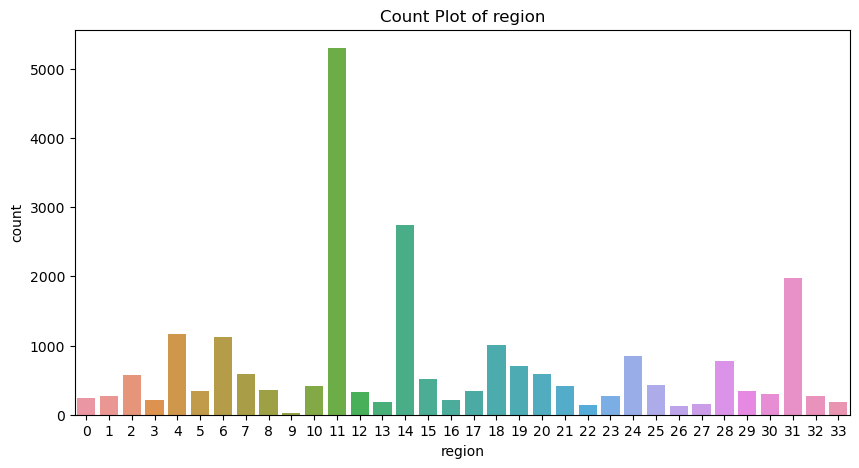

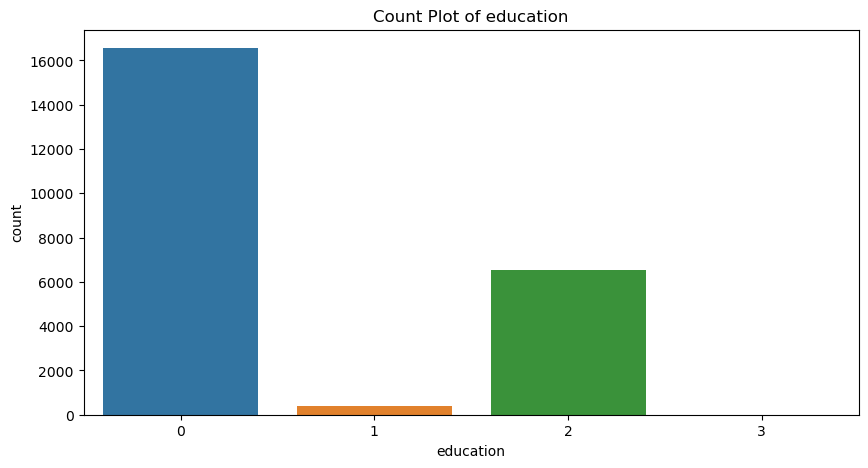

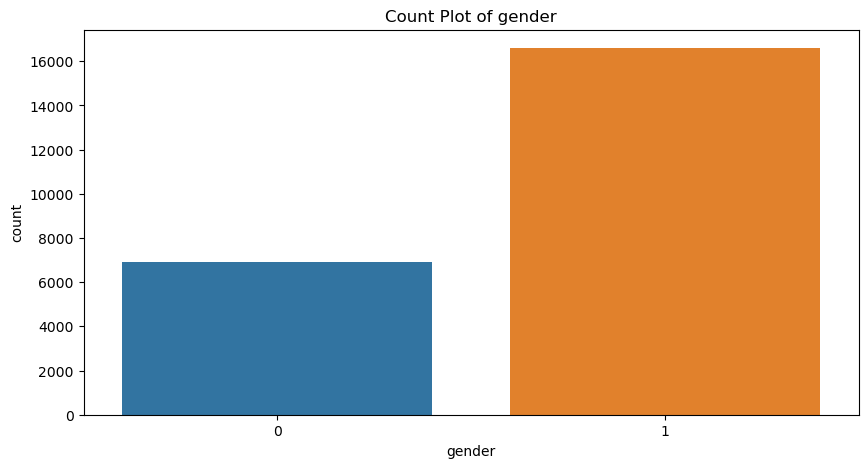

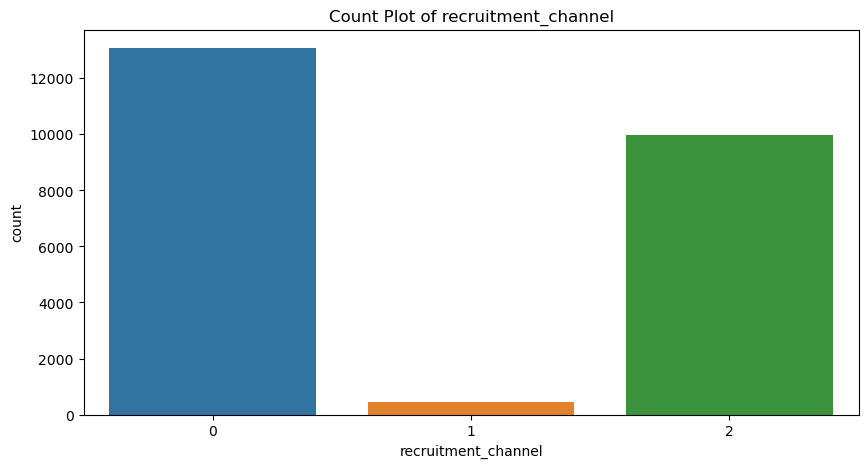

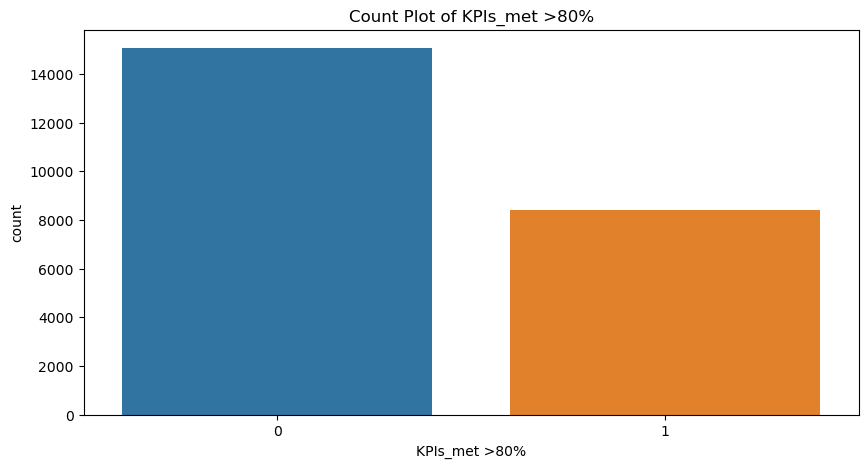

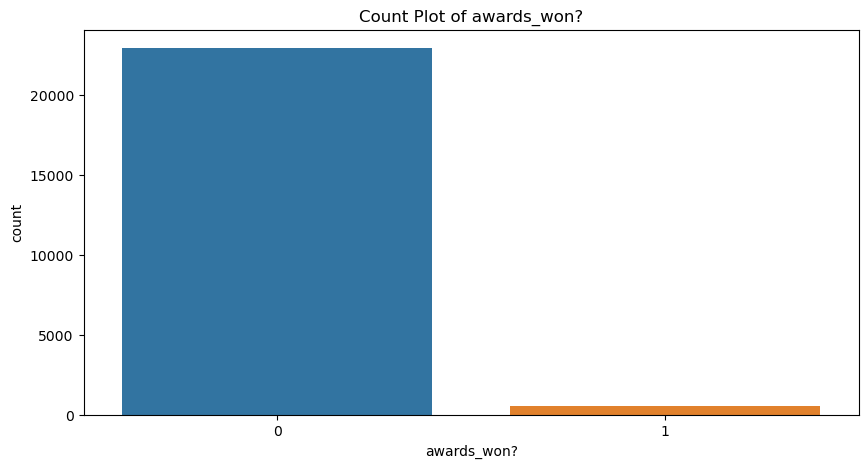

In [18]:
# Plot count plots for categorical features
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=column)
    plt.title(f'Count Plot of {column}')
    plt.show()

# Plot count plots for binary features
binary_columns = ['KPIs_met >80%', 'awards_won?']
for column in binary_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=column)
    plt.title(f'Count Plot of {column}')
    plt.show()


# Data Scaling
**Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing.**

**In this task, We use the below-mentioned Scalers to check their effect on our data and choose the most appropriate Scaler based on the results. More on Scalers and their purpose has been provided as a resource in the resource hub.**

*-RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler*

*Create a function to run the given four scalers on your dataset and return the resultant scaled dataset. Make changes to parameters in such a way that you can iterate over various scalers to get datasets.*

In [19]:
# Identify and clean any unexpected object columns
for column in data.columns:
    if data[column].dtype == 'object':
        print(f"Column {column} is of type object.")

# Remove or rename the 'age_department' column if it exists erroneously
if 'age_department' in data.columns:
    data = data.drop('age_department', axis=1)

# Ensure all columns are of appropriate types
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Define the target variable and features
X = data.drop('KPIs_met >80%', axis=1)  # Features
y = data['KPIs_met >80%']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Column age_department is of type object.


# RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

In [20]:
# Function to scale data using different scalers
def scale_data(X_train, X_test):
    scalers = {
        'StandardScaler': StandardScaler(),
        'RobustScaler': RobustScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'MaxAbsScaler': MaxAbsScaler()
    }

    scaled_datasets = {}
    for scaler_name, scaler in scalers.items():
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        scaled_datasets[scaler_name] = (X_train_scaled, X_test_scaled)
    
    return scaled_datasets

scaled_datasets = scale_data(X_train, X_test)


# Create Baseline ML Model for Binary Classification Problem


**We will be using 3 models for this problem -  XGBoost, CatBoost, LightGBM**

*-Run the dataset through XGBoost to predict the target variable and check the accuracy*

*-Run the dataset through CatBoost to predict the target variable and check the accuracy*

*-Run the dataset through LightGBM to predict the target variable and check the accuracy*

In [21]:
# Function to train and evaluate models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    # Train XGBoost model
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, 
                eval_metric='logloss', enable_categorical=True)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    results['XGBoost'] = accuracy_xgb
    
    # Train CatBoost model
    cat_model = CatBoostClassifier(silent=True)
    cat_model.fit(X_train, y_train)
    y_pred_cat = cat_model.predict(X_test)
    accuracy_cat = accuracy_score(y_test, y_pred_cat)
    results['CatBoost'] = accuracy_cat

    # Train LightGBM model
    lgb_model = lgb.LGBMClassifier()
    lgb_model.fit(X_train, y_train)
    y_pred_lgb = lgb_model.predict(X_test)
    accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
    results['LightGBM'] = accuracy_lgb

    return results

# Store results for each scaler
all_results = {}
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
    results = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)
    all_results[scaler_name] = results

# Display results
for scaler_name, results in all_results.items():
    print(f"Results for {scaler_name}:")
    for model_name, accuracy in results.items():
        print(f"{model_name} Accuracy: {accuracy:.4f}")
    print()

D:\ananconda\lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959


D:\ananconda\lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959


D:\ananconda\lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959


D:\ananconda\lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
Results for StandardScaler:
XGBoost Accuracy: 0.7180
CatBoost Accuracy: 0.7305
LightGBM Accuracy: 0.7318

Results for RobustScaler:
XGBoost Accuracy: 0.7180
CatBoost Accuracy: 0.7305
LightGBM Accuracy: 0.7346

Results for MinMaxScaler:
XGBoost Accuracy: 0.7180
CatBoost Accuracy: 0.7305
LightGBM Accuracy: 0.7307

Results for MaxAbsScaler:
XGBoost Accuracy: 0.7180
CatBoost Accuracy: 0.7305
LightGBM Accuracy: 0.7350



# Make a final decision on the model to be employed for this purpose

**Based on the above results, LightGBM with MaxAbsScaler achieved the highest accuracy. Therefore, LightGBM with MaxAbsScaler will be chosen as the final model for predicting employee performance.**


In [22]:
# Apply MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Final Model (LightGBM with MaxAbsScaler) Accuracy: {accuracy_lgb:.4f}")

[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
Final Model (LightGBM with MaxAbsScaler) Accuracy: 0.7350
